In [18]:
#ライブラリの読み込み
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from subprocess import call
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [19]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (15,10)

In [20]:
#データ（CSVファイル）の読み込み
train = pd.read_table("./input/train.tsv", low_memory=False)
test = pd.read_table("./input/test.tsv", low_memory=False)

In [21]:
train

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y
0,5,90,Private,313986,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
1,10,46,Private,74895,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1485,55,United-States,<=50K
2,11,37,Private,67433,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
3,13,45,Local-gov,144940,Masters,14,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,<=50K
4,14,40,Private,272960,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,42,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,32552,42,Private,83411,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Male,0,1408,40,United-States,<=50K
16276,32553,59,Self-emp-not-inc,223131,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States,<=50K
16277,32554,42,Private,142424,Assoc-voc,11,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16278,32555,19,?,119234,Some-college,10,Never-married,?,Other-relative,White,Female,0,0,15,United-States,<=50K


In [22]:
#データの前処理
X_train = train.drop(["Y"], axis=1)
y_train = train["Y"].values
X_test = test
X_traintest = pd.concat([X_train, X_test], axis=0)

In [23]:
#決定木に学習させる特徴量を設定、今回は教育を受けた年数、キャピタルロスと年齢のみ
X_traintest = X_traintest[['education-num', 'capital-loss', 'age']]

In [24]:
X_train = X_traintest.iloc[:train.shape[0], :]
X_test = X_traintest.iloc[train.shape[0]:, :]

In [30]:
#決定木のパラメータを設定
#最大深さを２に設定
params = {
    'criterion': 'gini', 
    'max_features': 'auto',
    'max_depth': 2, 
    'max_leaf_nodes': None,
    'random_state': 0,
}

In [26]:
#決定木の作成
model = DecisionTreeClassifier(**params)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

[Text(418.5, 453.0, 'capital-loss <= 1820.5\nentropy = 0.37\nsamples = 16280\nvalue = [12288, 3992]\nclass = <=50K'),
 Text(209.25, 271.8, 'age <= 31.5\nentropy = 0.355\nsamples = 15777\nvalue = [12143, 3634]\nclass = <=50K'),
 Text(104.625, 90.59999999999997, 'entropy = 0.129\nsamples = 5629\nvalue = [5240, 389]\nclass = <=50K'),
 Text(313.875, 90.59999999999997, 'entropy = 0.435\nsamples = 10148\nvalue = [6903, 3245]\nclass = <=50K'),
 Text(627.75, 271.8, 'education-num <= 12.5\nentropy = 0.41\nsamples = 503\nvalue = [145, 358]\nclass = >50K'),
 Text(523.125, 90.59999999999997, 'entropy = 0.488\nsamples = 267\nvalue = [113, 154]\nclass = >50K'),
 Text(732.375, 90.59999999999997, 'entropy = 0.234\nsamples = 236\nvalue = [32, 204]\nclass = >50K')]

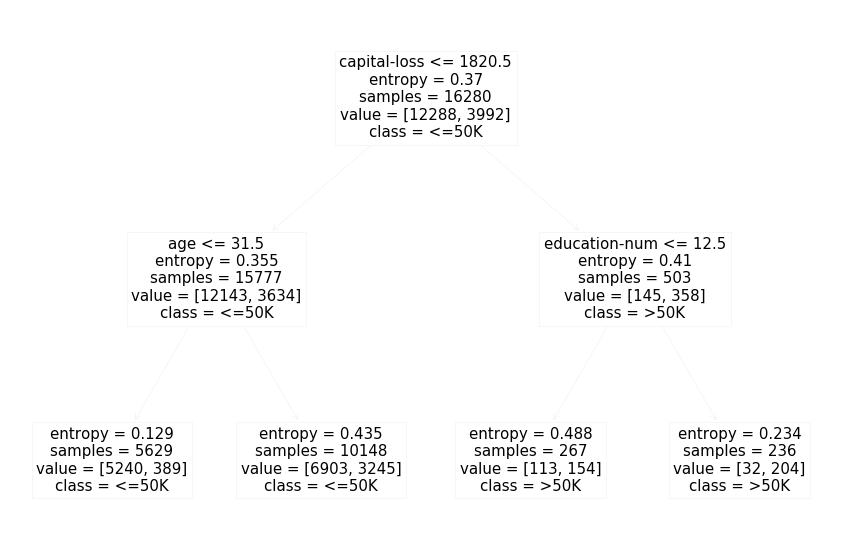

In [27]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(model,
               feature_names=X_traintest.columns, 
              class_names=['<=50K','>50K'],
              fontsize=15)

## 演習
上の木構造の図(Tree図)から，どんな人が収入が＄50K以上で、どんな人が収入が＄50K以下であるか説明してください  
右の矢印はNo、左の矢印はYesを意味しています   
"sample"は何人が条件に含まれているか、"value"はその条件下で各クラスに何人が当てはまるかを示しています  
"class" は収入が＄50K以上かどうかを意味しています  

ここに入力してください

In [28]:
#Accuracyが高いほど良い精度で予測ができています

#トレーニングデータを学習して，トレーニングデータで評価を行った時のAccuracy
y_pred = model.predict(X_train)
print('Training accuracy: {}'.format(accuracy_score(y_pred, y_train)))

Training accuracy: 0.7678746928746929


In [29]:
#予測
test_pred = model.predict(X_test)

In [13]:
#サブミット用ファイルの出力
sub_df = pd.DataFrame({"id": test["id"].values,"Y": test_pred})
sub_df.to_csv("output/submission.csv", index = False, header=False)

In [14]:
sub_df

,id,Y
0,0,<=50K
1,1,<=50K
2,2,<=50K
3,3,<=50K
4,4,<=50K
...,...,...
16276,32549,<=50K
16277,32556,<=50K
16278,32558,<=50K
16279,32559,<=50K
